In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 

#generate a data set of 10000. 
#for simplicity, 5000 in the first quadrant, another 5000 in the third quadrant 
X1 = []
Y1 = []
X2 = []
Y2 = []

for i in range(5000):
    X1.append(random.uniform(0,1))
    Y1.append(random.uniform(0,1))
    X2.append(random.uniform(-1,0))
    Y2.append(random.uniform(-1,0))
    
#label the data
data1 = [np.array([1,X1[i],Y1[i],1]) for i in range(5000)]
data2 = [np.array([1,X2[i],Y2[i],-1]) for i in range(5000)]
data = data1 + data2

Text(0,0.5,'y')

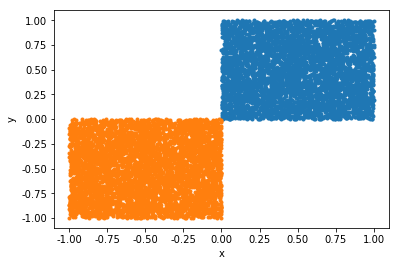

In [2]:
%matplotlib inline

plt.plot(X1, Y1, '.')
plt.plot(X2, Y2, '.')
plt.xlabel('x')
plt.ylabel('y')

In [3]:
data = np.array(data)
w = np.array([[0.0],[0.0],[0.0]])

In [4]:
def alfaPerception(alfa):
    w = np.array([[0.0],[0.0],[0.0]])

    for i in range(1000):
        s = np.dot(data[:, 0:3], w)
        y_pred = np.ones((len(data), 1))
        loc_n = np.where(s < 0)[0]
        y_pred[loc_n] = -1
        num_fault = len(np.where(data[:,-1] != y_pred.T)[0])
#         print('Iteration %2d, wrongly classified points：%2d' % (i, num_fault))
        if num_fault == 0:
            break
        else:
            t = np.where(data[:,-1].reshape(len(data),1) != y_pred)[0][0]
            w += alfa * (data[t][-1] - s[t]) * data[t, :-1].reshape((3,1))
    print('Iterations to converge: %2d' % (i))
    return w

In [7]:
w0 = alfaPerception(100)

Iterations to converge: 195


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in add
  after removing the cwd from sys.path.


Text(0,0.5,'y')

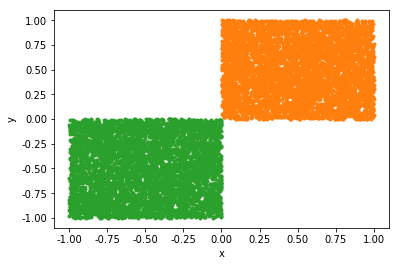

In [76]:
x1 = -1
y1 = -1 / w0[2] * (w0[0] * 1 + w0[1] * x1)
x2 = 1
y2 = -1 / w0[2] * (w0[0] * 1 + w0[1] * x2)
plt.plot([x1,x2], [y1,y2])
plt.plot(X1, Y1, '.')
plt.plot(X2, Y2, '.')
plt.xlabel('x')
plt.ylabel('y')

Iterations to converge: 741


Text(0,0.5,'y')

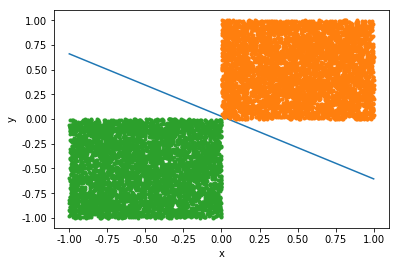

In [77]:
w1 = alfaPerception(1)

x1 = -1
y1 = -1 / w1[2] * (w1[0] * 1 + w1[1] * x1)
x2 = 1
y2 = -1 / w1[2] * (w1[0] * 1 + w1[1] * x2)
plt.plot([x1,x2], [y1,y2])
plt.plot(X1, Y1, '.')
plt.plot(X2, Y2, '.')
plt.xlabel('x')
plt.ylabel('y')

# It takes a long time for alfa = 1 to converge. Slower than no alfa.

Iterations to converge:  2


Text(0,0.5,'y')

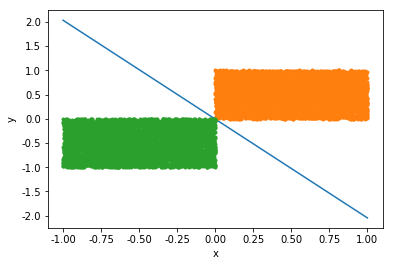

In [78]:
w2 = alfaPerception(0.01)

x1 = -1
y1 = -1 / w2[2] * (w2[0] * 1 + w2[1] * x1)
x2 = 1
y2 = -1 / w2[2] * (w2[0] * 1 + w2[1] * x2)
plt.plot([x1,x2], [y1,y2])
plt.plot(X1, Y1, '.')
plt.plot(X2, Y2, '.')
plt.xlabel('x')
plt.ylabel('y')

# Alfa = 0.01 converges faster. Faster than no alfa.

Iterations to converge:  2


Text(0,0.5,'y')

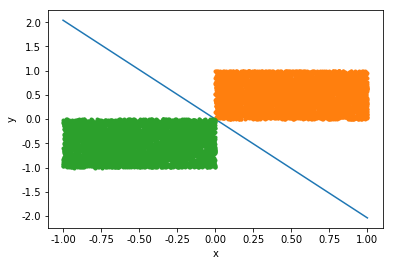

In [79]:
w3 = alfaPerception(0.0001)
x1 = -1
y1 = -1 / w3[2] * (w3[0] * 1 + w3[1] * x1)
x2 = 1
y2 = -1 / w3[2] * (w3[0] * 1 + w3[1] * x2)
plt.plot([x1,x2], [y1,y2])
plt.plot(X1, Y1, '.')
plt.plot(X2, Y2, '.')
plt.xlabel('x')
plt.ylabel('y')

# Alfa = 0.0001 converges fast too. Faster than no alfa.